In [33]:
import pandas as pd
import spacy
from tqdm import tqdm
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Load spaCy model with word embeddings
nlp = spacy.load("en_core_web_md")

# Load your spreadsheet
df = pd.read_csv("album_info.csv")  # Replace with the actual file path

# Select only the first 100 reviews
#df = df.head(10000)

# Tokenize and average word vectors for each review
def get_average_vector(text):
    doc = nlp(text)
    return doc.vector

In [34]:
df['vector'] = df['body'].apply(get_average_vector)

# Convert the vectors to a 2D numpy array
X = np.vstack(df['vector'].to_numpy())

# Reshape the vectors
X_train, X_test, y_train, y_test = train_test_split(X, df['score'], test_size=0.2, random_state=42)

In [36]:
# Train a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict scores on the test set
y_pred = regressor.predict(X_test)

# Scale the predicted scores to match the original score range
scaler = MinMaxScaler(feature_range=(0, 100))
y_pred_scaled = scaler.fit_transform(y_pred.reshape(-1, 1))

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred_scaled)
print(f"Mean Squared Error: {mse}")

# You can print the predicted scores and actual scores for further analysis
# print("Actual Scores:", y_test.values)
# print("Predicted Scores:", y_pred_scaled.flatten())

Mean Squared Error: 1838.0070362459408


In [39]:
import joblib

joblib.dump(regressor, 'linear_regression_model.joblib')

# Save the scaler
joblib.dump(scaler, 'min_max_scaler.joblib')

# Save the spaCy model (optional, as spaCy models are usually large)
nlp.to_disk('spacy_model')


# Load the trained model
loaded_regressor = joblib.load('linear_regression_model.joblib')

# Load the scaler
loaded_scaler = joblib.load('min_max_scaler.joblib')

In [ ]:
### NEW APPROACH ###

In [41]:
import pandas as pd
import spacy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load spaCy model with word embeddings
nlp = spacy.load("en_core_web_md")

# Assuming you have a DataFrame 'df' with 'body' and 'score' columns
X = df['body'].apply(lambda x: nlp(x).vector).to_list()
y = df['score'].to_list()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict scores on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.1493346247155394


In [ ]:
# Visualization
plt.scatter(df['sentiment_score'], y, label='Actual Scores')
plt.scatter(df['sentiment_score'], regressor.predict(X), label='Predicted Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Score')
plt.legend()
plt.show()

In [42]:
# Save the model to a file
model_filename = '2nd_linear_regression_model.joblib'
joblib.dump(regressor, model_filename)

# Load the model from the file
loaded_regressor = joblib.load(model_filename)

In [ ]:
### NEW APPROACH ###

In [43]:
! pip install nltk

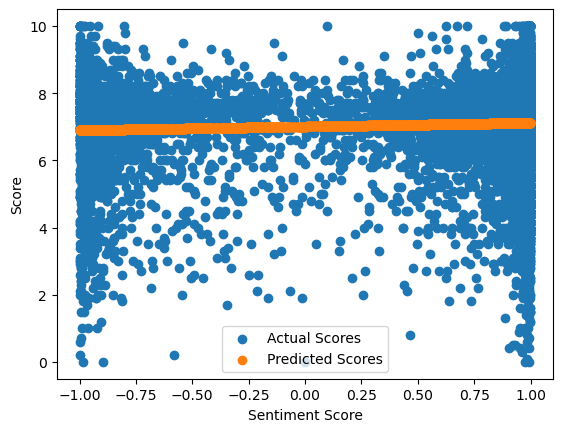

In [44]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['body'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Feature Engineering
X = df[['sentiment_score']]  # Add other features as needed
y = df['score']

# Train a Model (you can replace this with your existing regression model)
regressor = LinearRegression()
regressor.fit(X, y)

# Visualization
plt.scatter(df['sentiment_score'], y, label='Actual Scores')
plt.scatter(df['sentiment_score'], regressor.predict(X), label='Predicted Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Score')
plt.legend()
plt.show()

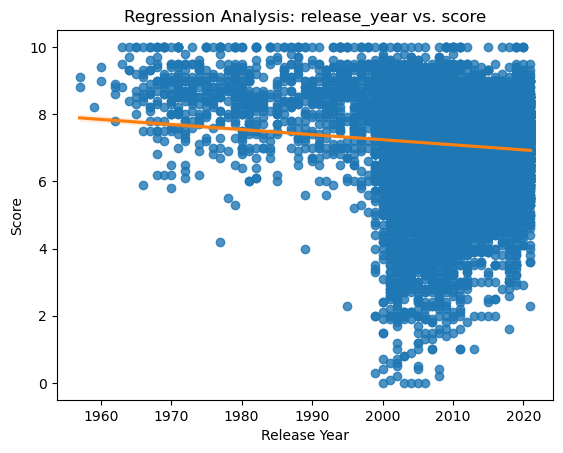

Correlation between release_year and score: -0.10325552923625814


In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your spreadsheet
df = pd.read_csv("album_info.csv")  # Replace with the actual file path

# Perform regression analysis with an orange line and blue dots
sns.regplot(x='release_year', y='score', data=df, line_kws={"color": "tab:orange"}, scatter_kws={"color": "tab:blue"})
plt.title('Regression Analysis: release_year vs. score')
plt.xlabel('Release Year')
plt.ylabel('Score')
plt.show()

# Calculate correlation coefficient
correlation = df['release_year'].corr(df['score'])
print(f'Correlation between release_year and score: {correlation}')


LinregressResult(slope=-0.015118288208203835, intercept=37.47460277625997, rvalue=-0.10325552923625814, pvalue=8.405319781264356e-52, stderr=0.0009956706782036564, intercept_stderr=2.0014127035175897)


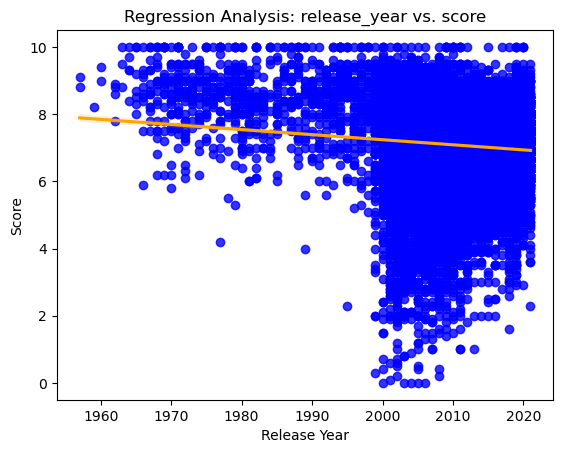

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load your spreadsheet
df = pd.read_csv("album_info.csv")  # Replace with the actual file path

# Perform linear regression
result = linregress(x=df['release_year'], y=df['score'])

# Display regression summary
print(result)

# Plot regression line and points
sns.regplot(x='release_year', y='score', data=df, line_kws={"color": "orange"}, scatter_kws={"color": "blue"})
plt.title('Regression Analysis: release_year vs. score')
plt.xlabel('Release Year')
plt.ylabel('Score')
plt.show()


LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)


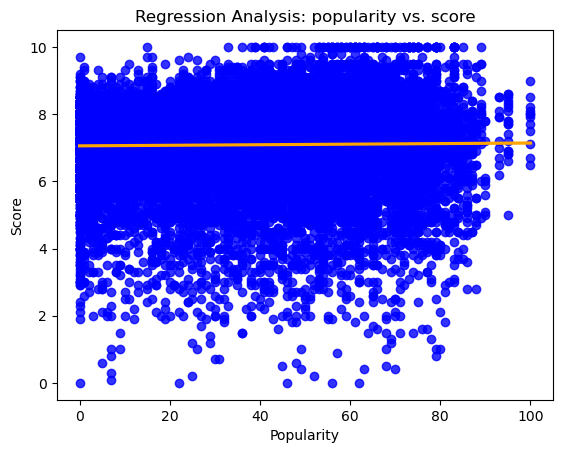

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load your spreadsheet
df = pd.read_csv("album_info.csv")  # Replace with the actual file path

# Perform linear regression
result = linregress(x=df['popularity'], y=df['score'])

# Display regression summary
print(result)

# Plot regression line and points
sns.regplot(x='popularity', y='score', data=df, line_kws={"color": "orange"}, scatter_kws={"color": "blue"})
plt.title('Regression Analysis: popularity vs. score')
plt.xlabel('Popularity')
plt.ylabel('Score')
plt.show()
